<a href="https://colab.research.google.com/github/June823/-DOCTYPE/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load MNIST (handwritten digits)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Show shapes
x_train.shape, y_train.shape


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,))

In [3]:
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')   # 10 classes for digits 0–9
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.9018 - loss: 0.3210 - val_accuracy: 0.9854 - val_loss: 0.0440
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9856 - loss: 0.0474 - val_accuracy: 0.9890 - val_loss: 0.0348
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9896 - loss: 0.0324 - val_accuracy: 0.9876 - val_loss: 0.0376
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9925 - loss: 0.0241 - val_accuracy: 0.9903 - val_loss: 0.0317
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9906 - val_loss: 0.0299


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9885 - loss: 0.0387


0.9905999898910522

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


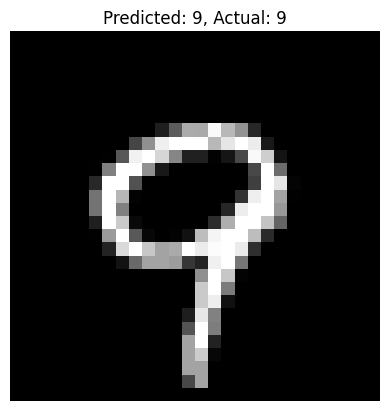

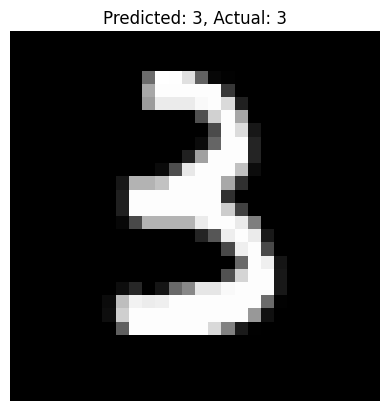

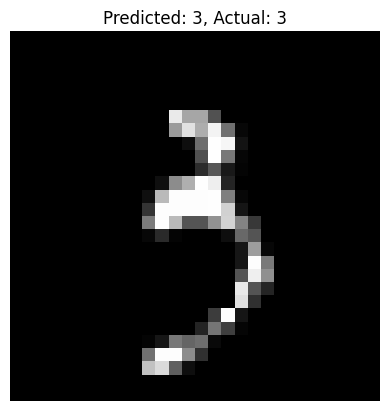

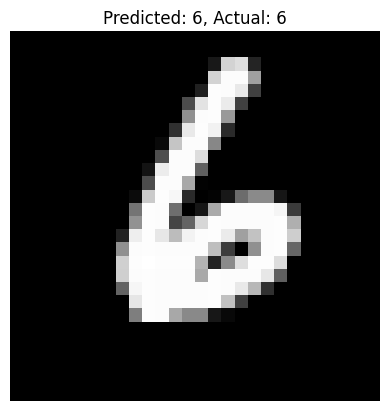

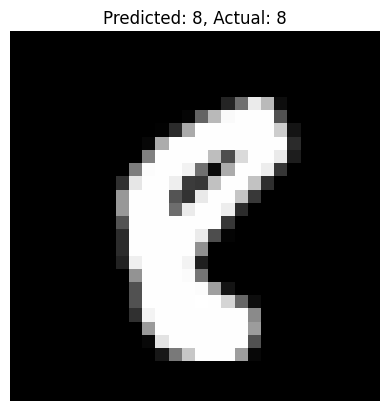

In [8]:
# Pick 5 random images
indices = np.random.choice(len(x_test), 5)
sample_images = x_test[indices]
sample_labels = y_test[indices]

# Make predictions
predictions = model.predict(sample_images)

# Plot
for i in range(5):
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {sample_labels[i]}")
    plt.axis('off')
    plt.show()
